In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, auc, confusion_matrix, classification_report

# Models
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
# Loading ROS-resampled dataset
df = pd.read_csv("../data/resampled_datas/resampled_borderlinesmote.csv")
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [3]:
# Spliting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Defining models to evaluate
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB()
}

results = []


MODEL: Decision Tree
Accuracy: 0.8184
ROC-AUC: 0.8180
PR-AUC: 0.8663

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.82      0.82      1021
         1.0       0.82      0.82      0.82      1049

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



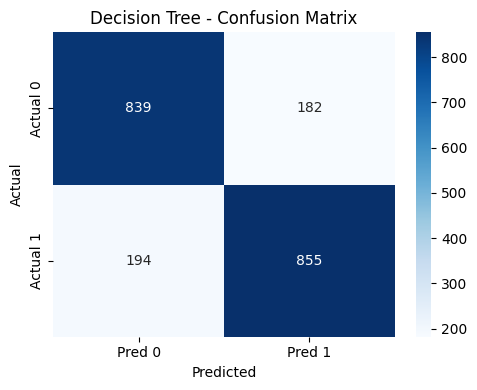


MODEL: XGBoost


/Users/kocak/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:09:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8483
ROC-AUC: 0.9368
PR-AUC: 0.9493

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      1021
         1.0       0.86      0.84      0.85      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



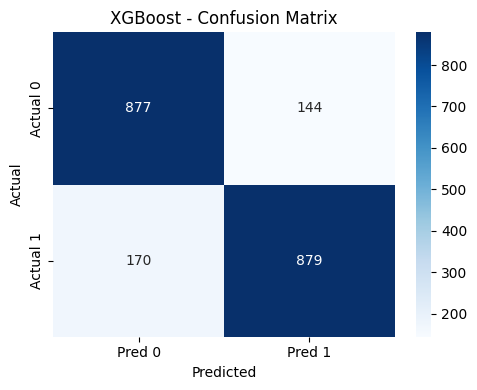


MODEL: KNN
Accuracy: 0.7739
ROC-AUC: 0.8276
PR-AUC: 0.8144

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.69      0.75      1021
         1.0       0.74      0.86      0.79      1049

    accuracy                           0.77      2070
   macro avg       0.78      0.77      0.77      2070
weighted avg       0.78      0.77      0.77      2070



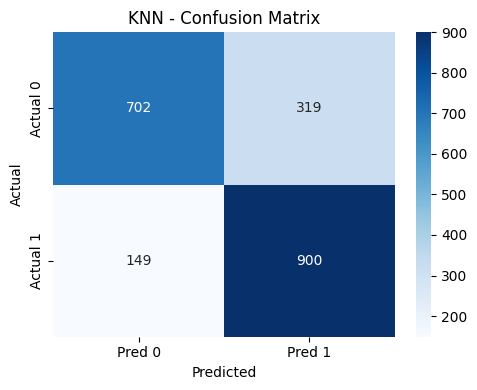


MODEL: Random Forest
Accuracy: 0.8546
ROC-AUC: 0.9378
PR-AUC: 0.9454

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86      1021
         1.0       0.88      0.83      0.85      1049

    accuracy                           0.85      2070
   macro avg       0.86      0.85      0.85      2070
weighted avg       0.86      0.85      0.85      2070



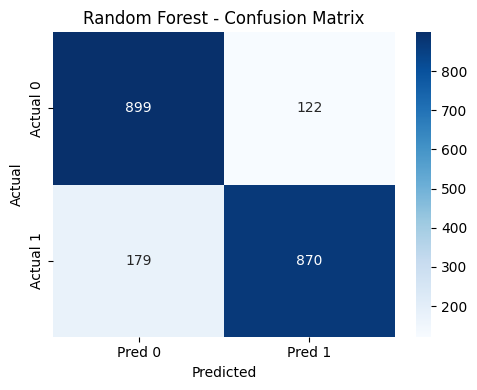


MODEL: Logistic Regression
Accuracy: 0.7647
ROC-AUC: 0.8345
PR-AUC: 0.7938

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.69      0.74      1021
         1.0       0.74      0.83      0.78      1049

    accuracy                           0.76      2070
   macro avg       0.77      0.76      0.76      2070
weighted avg       0.77      0.76      0.76      2070



/Users/kocak/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


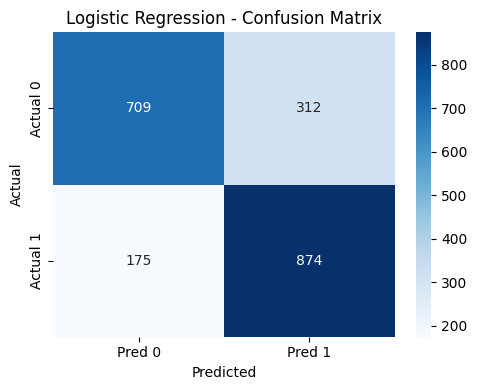


MODEL: SVM
Accuracy: 0.6237
ROC-AUC: 0.6861
PR-AUC: 0.6893

Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.58      0.60      1021
         1.0       0.62      0.67      0.64      1049

    accuracy                           0.62      2070
   macro avg       0.62      0.62      0.62      2070
weighted avg       0.62      0.62      0.62      2070



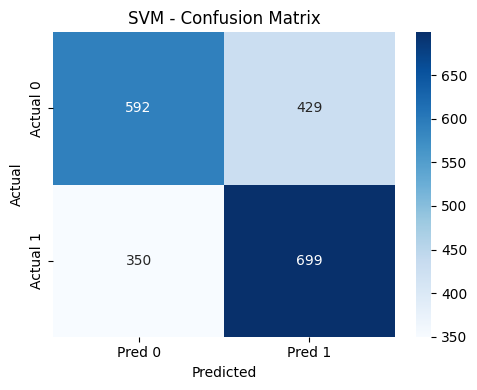


MODEL: Naive Bayes
Accuracy: 0.7560
ROC-AUC: 0.8277
PR-AUC: 0.7923

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.63      0.72      1021
         1.0       0.71      0.88      0.78      1049

    accuracy                           0.76      2070
   macro avg       0.77      0.75      0.75      2070
weighted avg       0.77      0.76      0.75      2070



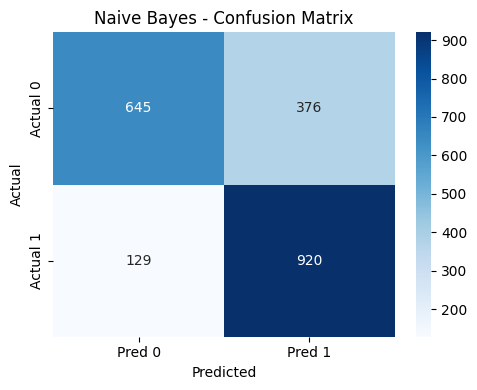

In [5]:
# Training and evaluating each model
for name, model in models.items():
    print(f"\nMODEL: {name}") 
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculating performance metrics
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)

    print(f"Accuracy: {acc:.4f}")
    print(f"ROC-AUC: {roc:.4f}")
    print(f"PR-AUC: {pr_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Storing results
    results.append({
        "Model": name,
        "Accuracy": acc,
        "ROC-AUC": roc,
        "PR-AUC": pr_auc
    })

    # Ploting confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

In [6]:
# Showing results as a DataFrame
df_results = pd.DataFrame(results)
print("\nModel Comparison (sorted by PR-AUC):")
print(df_results.sort_values(by="PR-AUC", ascending=False))


Model Comparison (sorted by PR-AUC):
                 Model  Accuracy   ROC-AUC    PR-AUC
1              XGBoost  0.848309  0.936835  0.949336
3        Random Forest  0.854589  0.937827  0.945396
0        Decision Tree  0.818357  0.818046  0.866265
2                  KNN  0.773913  0.827594  0.814430
4  Logistic Regression  0.764734  0.834467  0.793811
6          Naive Bayes  0.756039  0.827717  0.792312
5                  SVM  0.623671  0.686067  0.689319
